In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv("airplane_crashes_and_fatalities_since_1908.csv")

In [3]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [5]:
df.isnull().sum() 

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [6]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [ ]:
#df.columns = df.columns.to_series().apply(lambda x: x.strip()

In [7]:
df1 = df[['Operator', 'Type']]

In [8]:
df1.head()

,Operator,Type
0,Military - U.S. Army,Wright Flyer III
1,Military - U.S. Navy,Dirigible
2,Private,Curtiss seaplane
3,Military - German Navy,Zeppelin L-1 (airship)
4,Military - German Navy,Zeppelin L-2 (airship)


In [9]:
df1.Operator = df1.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
operator_count = df1.groupby(["Operator"])['Operator'].count()
operator_count = operator_count.rename(columns={'Operator': 'Count'})


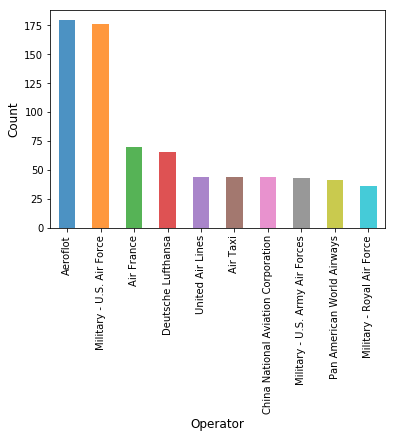

In [11]:
opr_chart= operator_count.sort_values(ascending=False)[:10].plot(kind='bar', alpha=0.8)
opr_chart.set_xlabel("Operator", fontsize=12)
opr_chart.set_ylabel("Count", fontsize=12)
plt.show()

In [12]:
df2 = df[['Operator', 'Aboard', 'Fatalities', 'Ground']]

In [13]:
df2.groupby(['Operator']).max()
df2.head(15)

,Operator,Aboard,Fatalities,Ground
0,Military - U.S. Army,2.0,1.0,0.0
1,Military - U.S. Navy,5.0,5.0,0.0
2,Private,1.0,1.0,0.0
3,Military - German Navy,20.0,14.0,0.0
4,Military - German Navy,30.0,30.0,0.0
5,Military - German Navy,41.0,21.0,0.0
6,Military - German Navy,19.0,19.0,0.0
7,Military - German Army,20.0,20.0,0.0
8,Military - German Navy,22.0,22.0,0.0
9,Military - German Navy,19.0,19.0,0.0


In [14]:
fatalities_count = df2.groupby(["Operator"])['Fatalities'].sum()
fatalities_count.sort_values(ascending=False).head(15)


Operator
Aeroflot                           7156.0
Military - U.S. Air Force          3717.0
Air France                         1734.0
American Airlines                  1421.0
Pan American World Airways         1302.0
Military - U.S. Army Air Forces    1070.0
United Air Lines                   1021.0
AVIANCA                             941.0
Turkish Airlines (THY)              891.0
Indian Airlines                     863.0
China Airlines (Taiwan)             847.0
Air India                           827.0
Military - Russian Air Force        797.0
Trans World Airlines                784.0
Military - U.S. Navy                767.0
Name: Fatalities, dtype: float64

In [16]:
totals_count = df2.groupby(["Operator"])['Aboard'].sum()
totals_count.sort_values(ascending=False).head(15)

Operator
Aeroflot                           8870.0
Military - U.S. Air Force          4502.0
Air France                         2874.0
Pan American World Airways         2812.0
United Air Lines                   2460.0
American Airlines                  2063.0
Philippine Air Lines               1712.0
China Airlines (Taiwan)            1590.0
Trans World Airlines               1577.0
Indian Airlines                    1453.0
Korean Airlines                    1449.0
Eastern Air Lines                  1360.0
Garuda Indonesia Airlines          1204.0
Military - U.S. Army Air Forces    1100.0
Japan Air Lines                    1094.0
Name: Aboard, dtype: float64

In [18]:
updated_df2 = pd.DataFrame({
    "Fatalities": fatalities_count,
    "Total Passengers": totals_count})

updated_df2.head()

,Fatalities,Total Passengers
Operator,,
A B Aerotransport,3.0,17.0
AB Aerotransport,58.0,64.0
ACES Colombia,40.0,41.0
ADC Airlines,97.0,160.0
ADES Colombia,22.0,23.0


In [21]:
updated_df2.sort_values(by='Fatalities', ascending=False).head(15)

,Fatalities,Total Passengers
Operator,,
Aeroflot,7156.0,8870.0
Military - U.S. Air Force,3717.0,4502.0
Air France,1734.0,2874.0
American Airlines,1421.0,2063.0
Pan American World Airways,1302.0,2812.0
Military - U.S. Army Air Forces,1070.0,1100.0
United Air Lines,1021.0,2460.0
AVIANCA,941.0,1067.0
Turkish Airlines (THY),891.0,964.0
